<a href="https://colab.research.google.com/github/abnerlugo1/Power-query/blob/main/Delta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import brown
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración warnings
# ==============================================================================
import libarchive
import pydot
import cartopy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#!pip install cartopy
#import cartopy

In [ ]:
# https://pypi.python.org/pypi/libarchive
#!apt-get -qq install -y libarchive-dev && pip install -U libarchive
#import libarchive

In [ ]:
# Lectura de datos
# ==============================================================================
file_path = '/content/mejora.xlsx'  # base
df2 = pd.read_excel(file_path)

In [ ]:
df2['livff_suburbia'] = df2['livff_suburbia'].str.lower()
df2['ciudad'] = df2['ciudad'].str.lower()
df2['Mejora'] = df2['Mejora'].str.lower()
df2['servicio'] = df2['servicio'].str.lower()

In [ ]:
df2.loc[df2["NPS"].isin([10, 9]), 'result'] = "promotor"
df2.loc[df2["NPS"].isin([7, 8]), 'result'] = "pasivo"
df2.loc[df2["NPS"].isin([0,1, 2, 3, 4, 5, 6]), 'result'] = "detractor"

In [ ]:
df2.loc[df2["EDS"].isin([5, 4]), 'result_EDS'] = "promotor"
df2.loc[df2["EDS"].isin([3]), 'result_EDS'] = "pasivo"
df2.loc[df2["EDS"].isin([1, 2, 0]), 'result_EDS'] = "detractor"

In [ ]:
df2.isna().sum()

,0
id,0
edad,0
genero,2
categoria,0
servicio,0
livff_suburbia,0
ciudad,5
estado,5
tipo_promocion,348
id_proveedor,324


In [ ]:
print(df2['Mejora'])

0       yo terminé haciendo la mitad del trabajo… y so...
1       yo terminé haciendo la mitad del trabajo… y so...
2       ya van 3 ocasiones que la atención brindada po...
3       ya van 3 ocasiones que la atención brindada po...
4       ya son dos experiencias de mala calidad en el ...
                              ...                        
1584    3 horas desde que el carro se descompuso hasta...
1585    1ro. nunca me dio la opción de que yo fuera a ...
1586    1ro. nunca me dio la opción de que yo fuera a ...
1587    1 dia antes solicite la grua ya que pude llega...
1588    1 dia antes solicite la grua ya que pude llega...
Name: Mejora, Length: 1589, dtype: object


In [ ]:
print(df2.groupby('livff_suburbia').size())

livff_suburbia
liverpool    1415
suburbia      174
dtype: int64


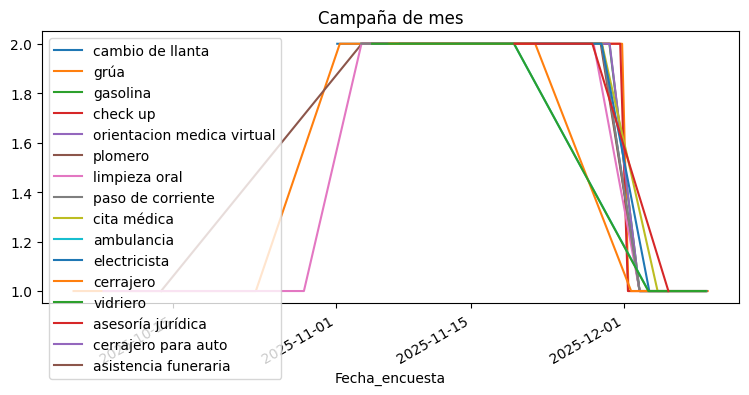

In [ ]:
# Distribución temporal de los tweets
# ==============================================================================
fig, ax = plt.subplots(figsize=(9,4))

for servicio in df2.servicio.unique():
    df_temp = df2[df2['servicio'] == servicio].copy()
    df_temp['Fecha_encuesta'] = pd.to_datetime(df_temp['Fecha_encuesta'])
    df_temp = df_temp.groupby(df_temp['Fecha_encuesta']).size()
    df_temp.plot(label=servicio, ax=ax)

ax.set_title('Campaña de mes')
ax.legend();

In [ ]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"
test1= "12"
print(test)
print(limpiar_tokenizar(texto=test1))

Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining
[]


In [ ]:
# Se aplica la función de quitar NAN
# ==============================================================================
cleaned_df = df2.dropna()

In [ ]:
# Se aplica la función de limpieza y tokenización
# ==============================================================================
df2['texto_tokenizado'] = df2['Mejora'].apply(lambda x: limpiar_tokenizar(x))
df2[['Mejora', 'texto_tokenizado']].head()

,Mejora,texto_tokenizado
0,yo terminé haciendo la mitad del trabajo… y so...,"[yo, terminé, haciendo, la, mitad, del, trabaj..."
1,yo terminé haciendo la mitad del trabajo… y so...,"[yo, terminé, haciendo, la, mitad, del, trabaj..."
2,ya van 3 ocasiones que la atención brindada po...,"[ya, van, ocasiones, que, la, atención, brinda..."
3,ya van 3 ocasiones que la atención brindada po...,"[ya, van, ocasiones, que, la, atención, brinda..."
4,ya son dos experiencias de mala calidad en el ...,"[ya, son, dos, experiencias, de, mala, calidad..."


In [ ]:
# Unnest de la columna texto_tokenizado
# ==============================================================================
tweets_tidy = df2.explode(column='texto_tokenizado')
# Drop the original 'Mejora' column as its content is now in 'texto_tokenizado' (soon to be 'token')
tweets_tidy = tweets_tidy.drop(columns='Mejora')
# Rename the exploded 'texto_tokenizado' column to 'token'
tweets_tidy = tweets_tidy.rename(columns={'texto_tokenizado':'token'})
tweets_tidy.head(3)

,id,edad,genero,categoria,servicio,livff_suburbia,ciudad,estado,tipo_promocion,id_proveedor,...,HORA LLAMADA DE ASIGNACION,TIEMPO TRANSCURRIDO DE ASIGNACION,ESTATUS DE ASIGNACION,HORA DE ARRIBO,TIEMPO TRANSCURRIDO DE ARRIBO,TIEMPO TOTAL TRANSCURRIDO,ESTATUS DE ARRIBO,result,result_EDS,token
0,1,61,F,Asistencia vial,cambio de llanta,liverpool,centro,TABASCO,07 PIF EXTRA,SERVICIO DE ARRASTRE HERMANAS RODRIGUEZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detractor,detractor,yo
0,1,61,F,Asistencia vial,cambio de llanta,liverpool,centro,TABASCO,07 PIF EXTRA,SERVICIO DE ARRASTRE HERMANAS RODRIGUEZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detractor,detractor,terminé
0,1,61,F,Asistencia vial,cambio de llanta,liverpool,centro,TABASCO,07 PIF EXTRA,SERVICIO DE ARRASTRE HERMANAS RODRIGUEZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,detractor,detractor,haciendo


In [ ]:
# Palabras totales utilizadas por cada autor
# ==============================================================================
print('--------------------------')
print('Palabras totales por servicio')
print('--------------------------')
tweets_tidy.groupby(by='result_EDS')['token'].count()

--------------------------
Palabras totales por servicio
--------------------------


,token
result_EDS,
detractor,20062
pasivo,5599
promotor,8237


In [ ]:
# Longitud media y desviación de los tweets de cada autor
# ==============================================================================
temp_df = pd.DataFrame(tweets_tidy.groupby(by = ["result_EDS"])["token"].count())
temp_df.reset_index().groupby("result_EDS")["token"].agg(['mean', 'std'])

,mean,std
result_EDS,,
detractor,20062.0,NaN
pasivo,5599.0,NaN
promotor,8237.0,NaN


In [ ]:
# Top 5 palabras más utilizadas por cada autor
# ==============================================================================
tweets_tidy.groupby(['result_EDS'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('result_EDS') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(5))

,,result_EDS,count
result_EDS,,,
detractor,0,detractor,20062
pasivo,1,pasivo,5599
promotor,2,promotor,8237


In [ ]:
# Obtención de listado de stopwords del español
# ==============================================================================
stop_words = list(stopwords.words('spanish'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("por", "de", "para", "si", "vas", "mucha", "muchas"
,"merece", "pudiera","seco","viaje", "ahi", "ahí", "normal", "ir", "acelera"
, "además", "correo", "folio", "nunca"))
print(stop_words[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [ ]:
# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

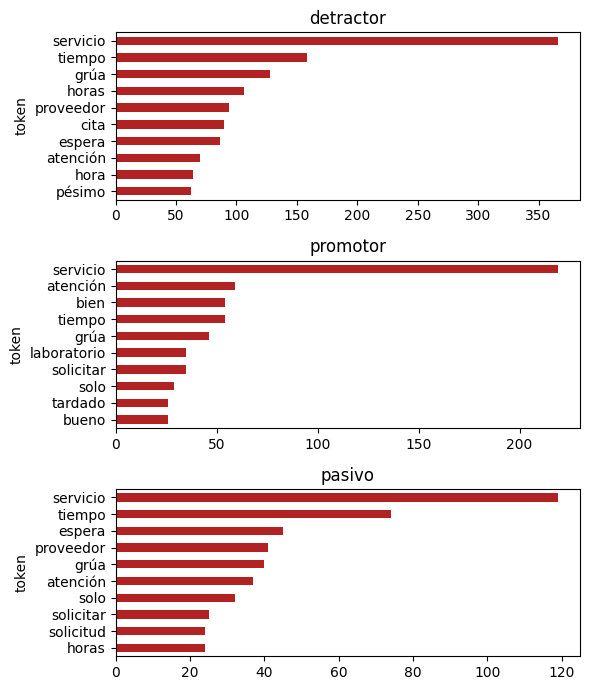

In [ ]:
# Top 10 palabras por autor (sin stopwords)
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(6, 7))
for i, result_EDS in enumerate(tweets_tidy.result_EDS.unique()):
    df_temp = tweets_tidy[tweets_tidy.result_EDS == result_EDS]
    counts  = df_temp['token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(result_EDS)

fig.tight_layout()

In [ ]:
##df1.explode(column='texto_tokenizado')

**Correlacion**

---



In [ ]:
# Pivotado de datos
# ==============================================================================
tweets_pivot = tweets_tidy.groupby(["result_EDS","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="result_EDS", values= "count")
tweets_pivot.columns.name = None

In [ ]:
# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

tweets_pivot.corr(method=similitud_coseno)

,detractor,pasivo,promotor
detractor,1.000000,0.918192,0.895704
pasivo,0.918192,1.000000,0.891656
promotor,0.895704,0.891656,1.000000


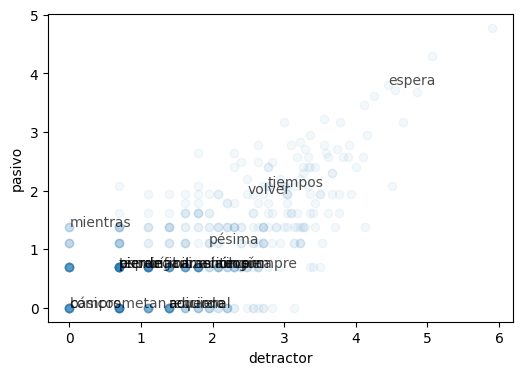

In [ ]:
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(6, 4))
temp = tweets_pivot.dropna()
sns.regplot(
    x  = np.log(temp.detractor),
    y  = np.log(temp.pasivo),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.detractor[i]), np.log(temp.pasivo[i])),
        alpha = 0.7
    )

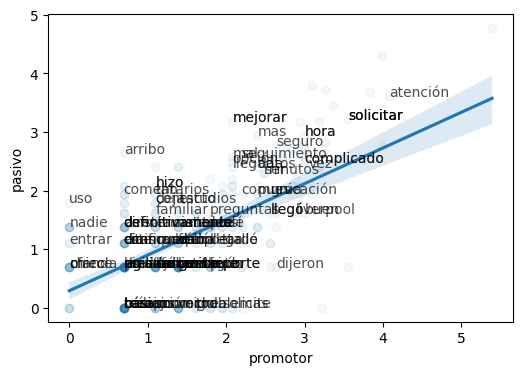

In [ ]:
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(6, 4))
temp = tweets_pivot.dropna()
sns.regplot(
    x  = np.log(temp.promotor),
    y  = np.log(temp.pasivo),
    scatter_kws =  {'alpha': 0.05},
    ax = ax
);
for i in np.random.choice(range(temp.shape[0]), 100):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.promotor[i]), np.log(temp.pasivo[i])),
        alpha = 0.7
    )

In [ ]:
# Número de palabras comunes
# ==============================================================================
palabras_promotor = set(tweets_tidy[tweets_tidy.result_EDS == 'promotor']['token'])
palabras_pasivo = set(tweets_tidy[tweets_tidy.result_EDS == 'pasivo']['token'])
palabras_detractor = set(tweets_tidy[tweets_tidy.result_EDS == 'detractor']['token'])

print(f"Palabras comunes entre promotor y pasivo: {len(palabras_promotor.intersection(palabras_pasivo))}")
print(f"Palabras comunes entre detractor y pasivo: {len(palabras_detractor.intersection(palabras_pasivo))}")

Palabras comunes entre promotor y pasivo: 388
Palabras comunes entre detractor y pasivo: 518


In [ ]:
# Cálculo del log of odds ratio de cada palabra (pasivo vs detractor)
# ==============================================================================
# Pivotaje y despivotaje
tweets_pivot = tweets_tidy.groupby(["result_EDS","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="result_EDS", values= "count")

tweets_pivot = tweets_pivot.fillna(value=0)
tweets_pivot.columns.name = None

tweets_unpivot = tweets_pivot.melt(value_name='n', var_name='result_EDS', ignore_index=False)
tweets_unpivot = tweets_unpivot.reset_index()

# Selección de los result_EDS elonmusk y mayoredlee
tweets_unpivot = tweets_unpivot[tweets_unpivot.result_EDS.isin(['pasivo', 'detractor'])]

# Se añade el total de palabras de cada autor
tweets_unpivot = tweets_unpivot.merge(
                    tweets_tidy.groupby('result_EDS')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'result_EDS'
                 )

# Cálculo de odds y log of odds de cada palabra
tweets_logOdds = tweets_unpivot.copy()
tweets_logOdds['odds'] = (tweets_logOdds.n + 1) / (tweets_logOdds.N + 1)
tweets_logOdds = tweets_logOdds[['token', 'result_EDS', 'odds']] \
                    .pivot(index='token', columns='result_EDS', values='odds')
tweets_logOdds.columns.name = None

tweets_logOdds['log_odds']     = np.log(tweets_logOdds.pasivo/tweets_logOdds.detractor)
tweets_logOdds['abs_log_odds'] = np.abs(tweets_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de ser de detractor. Esto es así porque el ratio sea ha
# calculado como detractor/pasivo.
tweets_logOdds['autor_frecuente'] = np.where(tweets_logOdds.log_odds > 0,
                                              "pasivo",
                                              "detractor"
                                    )

In [ ]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
tweets_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,detractor,pasivo,log_odds,abs_log_odds,autor_frecuente
token,,,,,
contactar,0.000101,0.002170,3.071688,3.071688,pasivo
escuchar,0.000101,0.001808,2.889367,2.889367,pasivo
encuesta,0.000101,0.001808,2.889367,2.889367,pasivo
inmediato,0.000101,0.001808,2.889367,2.889367,pasivo
primero,0.000101,0.001447,2.666223,2.666223,pasivo
perdió,0.000101,0.001447,2.666223,2.666223,pasivo
asesoría,0.000101,0.001447,2.666223,2.666223,pasivo
volvía,0.000101,0.001085,2.378541,2.378541,pasivo
voz,0.000101,0.001085,2.378541,2.378541,pasivo


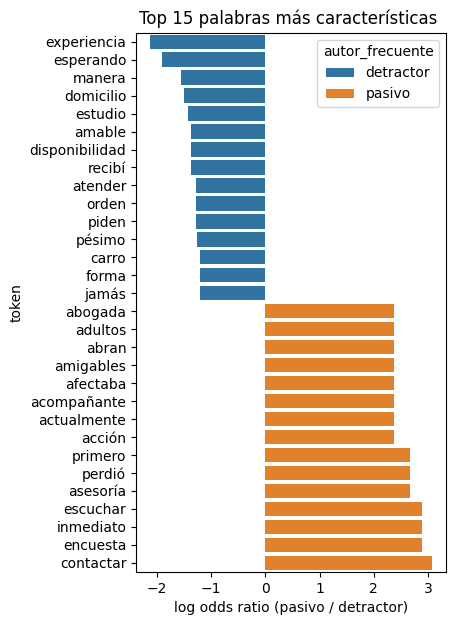

In [ ]:
# Top 15 palabras más características de cada autor
# ==============================================================================

top_30 = tweets_logOdds[['log_odds', 'abs_log_odds', 'autor_frecuente']] \
        .groupby('autor_frecuente') \
        .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(4, 7))
sns.barplot(
    x    = 'log_odds',
    y    = 'token',
    hue  = 'autor_frecuente',
    data = top_30,
    ax   = ax
)
ax.set_title('Top 15 palabras más características ')
ax.set_xlabel('log odds ratio (pasivo / detractor)');


**Term Frequency e Inverse Document Frequency:**

In [ ]:
# Cálculo term-frecuency (tf)
# ==============================================================================
tf = tweets_tidy.copy()
# Número de veces que aparece cada término
tf = tf.groupby(["id", "token"])["token"].agg(["count"]).reset_index()
# Se añade una columna con el total de términos
tf['total_count'] = tf.groupby('id')['count'].transform(sum)
# Se calcula el tf
tf['tf'] = tf["count"] / tf["total_count"]
tf.sort_values(by = "tf").head(3)

,id,token,count,total_count,tf
9212,979,años,1,100,0.01
9235,979,folleto,1,100,0.01
9236,979,gruas,1,100,0.01


In [ ]:
# Inverse document frequency
# ==============================================================================
idf = tweets_tidy.copy()
total_documents = idf["id"].drop_duplicates().count()
# Número de documentos (tweets) en los que aparece cada término
idf = idf.groupby(["token", "id"])["token"].agg(["count"]).reset_index()
idf['n_documentos'] = idf.groupby('token')['count'].transform(sum)
# Cálculo del idf
idf['idf'] = np.log(total_documents / idf['n_documentos'])
idf = idf[["token","n_documentos", "idf"]].drop_duplicates()
idf.sort_values(by="idf").head(3)

,token,n_documentos,idf
12597,servicio,704,0.810930
14476,tiempo,286,1.711717
6108,grúa,214,2.001733


In [ ]:
# Term Frequency - Inverse Document Frequency
# ==============================================================================
tf_idf = pd.merge(left=tf, right=idf, on="token")
tf_idf["tf_idf"] = tf_idf["tf"] * tf_idf["idf"]
tf_idf.sort_values(by="id").head()

,id,token,count,total_count,tf,n_documentos,idf,tf_idf
0,1,haciendo,1,5,0.2,9,5.170484,1.034097
1,1,mitad,1,5,0.2,3,6.269096,1.253819
3,1,terminé,1,5,0.2,6,5.575949,1.115190
2,1,mujer,1,5,0.2,2,6.674561,1.334912
4,1,trabajo…,1,5,0.2,2,6.674561,1.334912


Clasificación de comentarios

In [ ]:
# Reparto train y test
# ==============================================================================
# Filter tweets_tidy to only include the categories intended for classification
# Assuming the user wants to classify 'pasivo' vs 'detractor'
df_filtered = tweets_tidy[tweets_tidy.result_EDS.isin(['pasivo', 'detractor'])].copy()

# X should be the features (e.g., tokens) and y should be the target labels
# Note: 'token' here is a single word from the exploded DataFrame. For actual classification,
# these tokens would usually be vectorized (e.g., TF-IDF) per document/comment ID.
datos_X = df_filtered['token']
datos_y = df_filtered['result_EDS']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.2,
    random_state = 123
)

In [ ]:
value, counts = np.unique(y_train, return_counts=True)
print(dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print(dict(zip(value, 100 * counts / sum(counts))))

{'detractor': np.float64(78.3023507425986), 'pasivo': np.float64(21.697649257401398)}
{'detractor': np.float64(77.97010228166798), 'pasivo': np.float64(22.029897718332023)}


In [ ]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

In [ ]:
# Obtención de listado de stopwords del español
# ==============================================================================
stop_words = list(stopwords.words('spanish'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("por", "de", "para", "si", "vas", "mucha", "muchas"
,"merece", "pudiera","seco","viaje", "ahi", "ahí", "normal", "ir", "acelera"
, "además", "correo", "folio", "nunca"))
print(stop_words[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [ ]:
# Creación de la matriz tf-idf
# ==============================================================================
tfidf_vectorizador = TfidfVectorizer(
                        tokenizer  = limpiar_tokenizar,
                        min_df     = 3,
                        stop_words = stop_words
                    )
tfidf_vectorizador.fit(X_train.dropna())

TfidfVectorizer(min_df=3,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                tokenizer=<function limpiar_tokenizar at 0x7f6997254900>)

In [ ]:
tfidf_train = tfidf_vectorizador.transform(X_train.dropna())
tfidf_test  = tfidf_vectorizador.transform(X_test.dropna())

In [ ]:
print(f" Número de tokens creados: {len(tfidf_vectorizador.get_feature_names_out())}")
print(tfidf_vectorizador.get_feature_names_out()[:10])

 Número de tokens creados: 772
['abuso' 'accesible' 'acerca' 'acordado' 'actitud' 'acudir' 'acuerdo'
 'adecuada' 'ademas' 'adicional']


**Modelo SVM lineal**

In [ ]:
# Entrenamiento del modelo SVM
# ==============================================================================
modelo_svm_lineal = svm.SVC(kernel= "linear", C = 1.0)

# Filter y_train to match the non-null entries of X_train
y_train_filtered = y_train[X_train.notna()]

modelo_svm_lineal.fit(X=tfidf_train, y=y_train_filtered)

SVC(kernel='linear')

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 3, 10)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = svm.SVC(kernel= "linear"),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 5,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = tfidf_train, y = y_train[X_train.notna()])

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
5,0.278256,0.783768,0.001104,0.785908,0.001119
0,0.000010,0.783178,0.000197,0.783178,0.000049
1,0.000077,0.783178,0.000197,0.783178,0.000049
2,0.000599,0.783178,0.000197,0.783178,0.000049
3,0.004642,0.783178,0.000197,0.783178,0.000049
4,0.035938,0.783178,0.000197,0.783178,0.000049
6,2.154435,0.772356,0.004349,0.797639,0.001196
7,16.681005,0.772356,0.004349,0.797639,0.001196
8,129.154967,0.772356,0.004349,0.797639,0.001196
9,1000.000000,0.772356,0.004349,0.797639,0.001196


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo_final = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': np.float64(0.2782559402207126)} : 0.7837678307919331 accuracy


In [ ]:
# Error predicciones test
# ==============================================================================
predicciones_test = modelo_final.predict(X=tfidf_test)

print("-------------")
print("Error de test")
print("-------------")

print(f"Número de clasificaciones erróneas de un total de {tfidf_test.shape[0]} " \
      f"clasificaciones: {(y_test != predicciones_test).sum()}"
)
print(f"% de error: {100*(y_test != predicciones_test).mean()}")

print("")
print("-------------------")
print("Matriz de confusión")
print("-------------------")
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred= predicciones_test),
             columns= ["pasivo", "Mayor detractor"],
             index = ["pasivo", "Mayor detractor"])

-------------
Error de test
-------------
Número de clasificaciones erróneas de un total de 2542 clasificaciones: 561
% de error: 22.069236821400473

-------------------
Matriz de confusión
-------------------


,pasivo,Mayor detractor
pasivo,1975,7
Mayor detractor,554,6


**Análisis de sentimientos**

In [ ]:
# Descarga lexicon sentimientos
# ==============================================================================
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


Sentimiento promedio de cada


In [ ]:
# Sentimiento promedio
# ==============================================================================
tweets_sentimientos = pd.merge(
                            left     = tweets_tidy,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "termino",
                            how      = "inner"
                      )

tweets_sentimientos = tweets_sentimientos.drop(columns = "termino")

# Se suman los sentimientos de las palabras que forman cada tweet.
tweets_sentimientos = tweets_sentimientos[["result_EDS","Fecha_encuesta", "id", "sentimiento"]] \
                      .groupby(["result_EDS", "Fecha_encuesta", "id"])\
                      .sum().reset_index()
tweets_sentimientos.head()

,result_EDS,Fecha_encuesta,id,sentimiento
0,detractor,2025-11-04 17:46:36.803,79,-3
1,detractor,2025-11-04 17:46:36.803,80,-3
2,detractor,2025-11-06 12:40:41.060,437,2
3,detractor,2025-11-06 12:40:41.060,438,2
4,detractor,2025-11-19 12:53:39.010,221,-1


**análisis positivos, negativos y neutros**

In [ ]:
def perfil_sentimientos(df):
    print(result_EDS)
    print("=" * 12)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

for autor, df in tweets_sentimientos.groupby("result_EDS"):
    perfil_sentimientos(df)

pasivo
Positivos: 37.5
Neutros  : 0.0
Negativos: 62.5
 
pasivo
Positivos: 90.0
Neutros  : 0.0
Negativos: 10.0
 
pasivo
Positivos: 80.0
Neutros  : 0.0
Negativos: 20.0
 


***Evolución temporal***

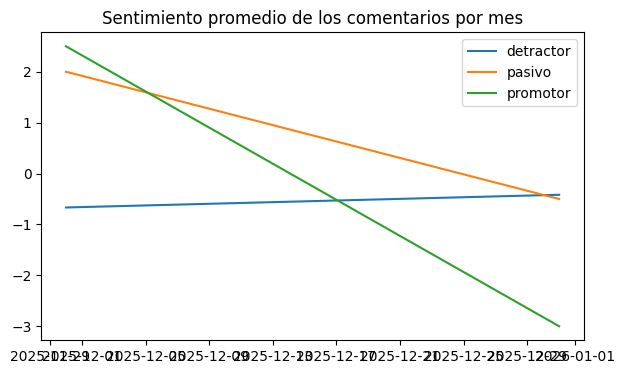

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

for result_EDS in tweets_sentimientos.result_EDS.unique():
    df = tweets_sentimientos[tweets_sentimientos.result_EDS == result_EDS].copy()
    df = df.set_index("Fecha_encuesta")
    df = df[['sentimiento']].resample('1M').mean()
    ax.plot(df.index, df.sentimiento, label=result_EDS)

ax.set_title("Sentimiento promedio de los comentarios por mes")
ax.legend();